# Tarea 3 Variables aleatorias multiples

## Situación

En el archivo xy.csv está el registro de la frecuencia relativa de dos variables aleatorias conjuntas en forma de tabla. También está el archivo xyp.csv donde vienen todos los pares (x, y) y su probabilidad asociada.

 ## Asignaciones

1. A partir de los datos, encontrar la mejor curva de ajuste (modelo probabilístico) para las funciones de densidad marginales de X y Y.

Por medio de la función de densidad Función de densidad probabilística conjunta de XY, se puede determinar la funciónes de densidad marginales de X y de Y.

La función de densidad marginal de X, se encuentra dejando fijo el valor en x y sumando sobre los valores de y asociados al valor en x. Para luego realizar una grafica de la suma de estos valores vs el valor de x y determinar por medio de una curva de ajuste el modelo que representa la función de densidad marginal.
De igual forma se calcula la función de densidad marginal de y, fijando el valor en y, sumando los valores asociados en x al valor en y de forma discreta, debido a que se tienen datos discretos.

In [226]:
#importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit 
from numpy import random

#cargando xy.csv,  eliminar primer fila, no cabeceras
datosxy=pd.read_csv('xy.csv',skiprows=1,header=None)
del datosxy[0] #elimina la columna 0

x=np.arange(5.0,16.0,1) # valores de x
y=np.arange(5.0,26.0,1) # valores y  // numpy.ndarray

In [227]:
# Calculando la función marginal de x

Xs=[0 for i in range(0,11)]

for i in range(0,11):
    Xs[i]=datosxy.loc[i].sum()

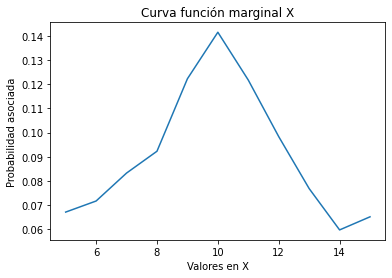

In [228]:
# Graficando la función marginal de x
plt.plot(x,Xs)
plt.title('Curva función marginal X')
plt.xlabel('Valores en X')
plt.ylabel('Probabilidad asociada')
plt.show()

In [229]:
# Calculando la función marginal de y

Ys=[0 for y in range(0,21)]

for i in range(1,21):
    Ys[i]=datosxy.loc[:,i].sum()

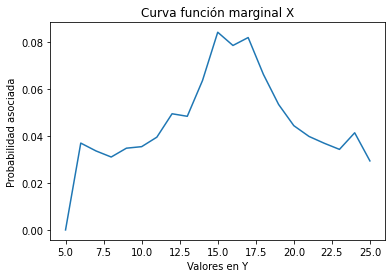

In [230]:
# Graficando la función marginal de Y
plt.plot(y,Ys)
plt.title('Curva función marginal X')
plt.xlabel('Valores en Y')
plt.ylabel('Probabilidad asociada')
plt.show()

La funciones marginales de X e Y, tienen una forma similar a una distribución gaussiana, se trata de aprocimar una curva de mejor ajuste a partir de una distribución gaussiana.

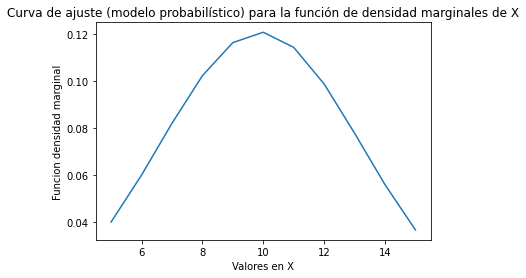

In [231]:
### Definiendo curva de mejor ajuste para la función marginal de X

def gaussiana(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x-mu)**2/(2*sigma**2))

# Determinando parametros curva de mejor ajuste
param,_=curve_fit(gaussiana,x,Xs) 

mu1=param[0]
sigma1=param[1]

# Evaluando curva de mejor ajuste
curvaX=gaussiana(x,mu1,sigma1)

# Imprime curva de mejor ajuste para la función marginal de X
plt.plot(x,curvaX)
plt.title('Curva de ajuste (modelo probabilístico) para la función de densidad marginales de X')
plt.xlabel('Valores en X')
plt.ylabel('Funcion densidad marginal')
plt.show()

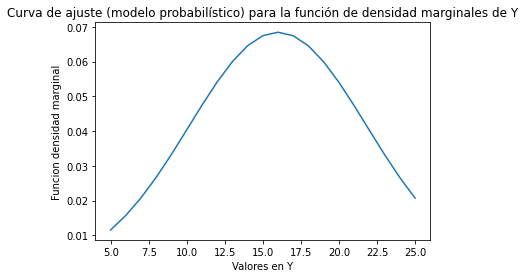

In [232]:
### Definiendo curva de mejor ajuste para la función marginal de Y

# Determinando parametros curva de mejor ajuste 
param,_=curve_fit(gaussiana,y,Ys) 

mu2=param[0]
sigma2=param[1]

# Evaluando curva de mejor ajuste
curvaY=gaussiana(y,mu2,sigma2)

# Imprime curva de mejor ajuste para la función marginal de Y
plt.plot(y,curvaY)
plt.title('Curva de ajuste (modelo probabilístico) para la función de densidad marginales de Y')
plt.xlabel('Valores en Y')
plt.ylabel('Funcion densidad marginal')
plt.show()

2. Asumir independencia de X y Y. Analíticamente, ¿cuál es entonces la expresión de la función de densidad conjunta que modela los datos?

Dos variables aleatorias son estadísticamente independientes si y solo si 
P{X ≤ x, Y ≤ y} = P{X ≤ x}P{Y ≤ y}, lo cual implica, que

F<sub>X,Y</sub>(x, y) = F<sub>X</sub>(x)F<sub>Y</sub>(y)

f<sub>X,Y</sub>(x, y) = f<sub>X</sub>(x)f<sub>Y</sub>(y)

Por tanto si se asume la independencia estadística, la función de densidad conjunta bivariada se calcula como fXY(x, y) = fX(x)fY(y). La cual tiene forma de función de densidad gaussiana

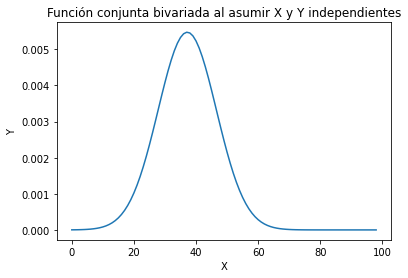

In [233]:
# Asumiendo independencia
semilla=np.linspace(0,30,99)

newcurvaX=gaussiana(semilla,mu1,sigma1)
newcurvaY=gaussiana(semilla,mu2,sigma2)
newcurvaXY=newcurvaX*newcurvaY



plt.plot(newcurvaXY)
plt.title('Función conjunta bivariada al asumir X y Y independientes')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

3. Hallar los valores de correlación, covarianza y coeficiente de correlación (Pearson) para los datos y explicar su significado.

El momento de segundo orden mx<sub>11</sub> = E[XY] es denominado la correlación de X y Y .
Recibe el símbolo especial R<sub>XY</sub> por su importancia.

Se calcula como la integral doble de menos infinito a mas infinito multiplicando los valores de X e Y por la función de densidad conjunta. Para este caso se trabajan con los datos proporcionados, donde se realiza una doble sumatoria, multiplicando los valores de X e Y por la probabilidad asociada.

In [234]:
# para el calculo de la correlación se utiliza el archivo xyp.csv,
# debido a que los datos se encuentran de una forma facil de manipular para este calculo

# cargando xyp.csv,  eliminar primer fila, no cabeceras
# para el calculo de la correlación se utiliza el archivo xyp.csv,
# debido a que los datos se encuentran de una forma facil de manipular para este calculo
datosxyp=pd.read_csv('xyp.csv',skiprows=1,header=None)


# multiplicando X, Y, P
datosxyp[3] = datosxyp[0] * datosxyp[1] * datosxyp[2]

correlacion=datosxyp.loc[:,3].sum()

#print(datosxyp)
print('la correlacion es:')
print(correlacion)

la correlacion es:
149.54281


Se optiene una correlación de 149.54281, lo indica que las expresiones X y Y están linealmente asociadas. Una correlación de 0 implica que no hay correlación entre X y Y.

El coeficiente de correlación nos indica de mejor manera el grado de dependencia entre dos variables. Al oscilar entre -1 y 1. Un valor de 0 implica que no existe una correlación lineal entre las variables. Un valor de -1 indica que crecer una variable, la otra variable disminuye. Un valor de 1 indica que al crecer una variable la otra aumenta también. Se procede a calcular el coeficiente de correlación de los datos con ayuda de la librerías de python.

In [235]:
#del datosxyp[2] #elimina la columna probabilidades
del datosxyp[3] #elimina la columna datos intermedios calculo correlacion

coeficiente_correlacion = datosxyp.corr(method='pearson')
print(coeficiente_correlacion)

          0         1         2
0  1.000000  0.000000 -0.032365
1  0.000000  1.000000  0.011596
2 -0.032365  0.011596  1.000000


Según los datos optenidos en el cálculo del coeficiente de correlación se puede apreciar, que las variables X e Y, no estan relacionadas linealmente. Se aprecia como al crecer X, la función de densidad conjunta bivariada decrece un poco. Al crecer positivamente Y, la función de densidad conjunta bivariada crece de forma positiva un poco.

Si X, Y son independientes o no están correlacionadas, entonces C<sub>XY</sub> = 0.
Se calcula la covarianza, la cual indica si el cambio en los datos se da de forma directa o inversa, dependiendo del valor de los signos de los valores optenidos. Se utiliza 
una función de python para el calculo de la misma.

In [236]:
covarianza = datosxyp.cov()
print(covarianza)

           0          1         2
0  10.043478   0.000000 -0.000284
1   0.000000  36.826087  0.000195
2  -0.000284   0.000195  0.000008


Se aprecia que el cambio en X e Y no se afectan entre si. La correlación había dado cero, por tanto se esperaba una covarianza de cero.

Se realiza la gráfica la función de densidad conjunta (3D). De los datos proprorcionados.

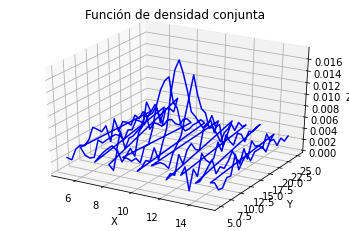

In [237]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(datosxyp[0],datosxyp[1],datosxyp[2], 'blue')
ax.set_title('Función de densidad conjunta')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()